In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle
import sys
import warnings
warnings.filterwarnings("ignore")

print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("pickle: built-in (Python stdlib)")
print("warnings: built-in (Python stdlib)")
print("Python:", sys.version)

pandas: 2.2.2
numpy: 1.26.4
pickle: built-in (Python stdlib)
warnings: built-in (Python stdlib)
Python: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]


In [2]:
df = pd.read_csv('../data/Netflix Dataset Latest 2021.csv', encoding='latin1')

df.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...",...,2021-03-03,NaN,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,NaN,...,2021-03-03,NaN,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,https://www.youtube.com/watch?v=5kyF2vy63r0,YouTube
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf SjÃ¶berg,Ivar Lo-Johansson,...,2021-03-03,NaN,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ,YouTube


In [3]:
df.drop(columns=['Netflix Link', 'IMDb Link', 'Image', 'Poster', 'TMDb Trailer', 'Trailer Site', 'Awards Nominated For'], inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9425 entries, 0 to 9424
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  9425 non-null   object 
 1   Genre                  9400 non-null   object 
 2   Tags                   9389 non-null   object 
 3   Languages              9255 non-null   object 
 4   Series or Movie        9425 non-null   object 
 5   Hidden Gem Score       9415 non-null   float64
 6   Country Availability   9414 non-null   object 
 7   Runtime                9424 non-null   object 
 8   Director               7120 non-null   object 
 9   Writer                 7615 non-null   object 
 10  Actors                 9314 non-null   object 
 11  View Rating            6827 non-null   object 
 12  IMDb Score             9417 non-null   float64
 13  Rotten Tomatoes Score  5445 non-null   float64
 14  Metacritic Score       4082 non-null   float64
 15  Awar

In [5]:
df.isnull().sum()

Title                       0
Genre                      25
Tags                       36
Languages                 170
Series or Movie             0
Hidden Gem Score           10
Country Availability       11
Runtime                     1
Director                 2305
Writer                   1810
Actors                    111
View Rating              2598
IMDb Score                  8
Rotten Tomatoes Score    3980
Metacritic Score         5343
Awards Received          4199
Boxoffice                5671
Release Date              208
Netflix Release Date        0
Production House         5032
Summary                     5
IMDb Votes                 10
dtype: int64

`'Metacritic Score' and 'Rotten Tomatoes Score' have too much Nan`

In [6]:
df.drop(columns=['Metacritic Score', 'Rotten Tomatoes Score'], inplace=True)

In [7]:
# Fill missing scores with median values
score_columns = [
    "IMDb Score",
    "Hidden Gem Score"
]

for col in score_columns:
    df[col].fillna(df[col].median(), inplace=True)

In [ ]:
# Handle categorical features
df["Summary"].fillna("Unknown", inplace=True)
df["Genre"].fillna("Unknown", inplace=True)
df["Languages"].fillna("Unknown", inplace=True)
df["Director"].fillna("Unknown", inplace=True)
df["Actors"].fillna("Unknown", inplace=True)

In [9]:
# Create composite quality score
df["Composite_Score"] = (
    0.7 * df["IMDb Score"]
    + 0.3 * df["Hidden Gem Score"]
        )

In [10]:
# Parse Boxoffice to numeric (remove $ and commas)
df['Boxoffice'] = df['Boxoffice'].str.replace(r'[\$,]', '', regex=True).astype(float)
df['Boxoffice'] = df['Boxoffice'].fillna(df['Boxoffice'].mean())

# Log-transform IMDb Votes and Awards (add 1 to avoid log(0))
df['Log_IMDb_Votes'] = np.log1p(df['IMDb Votes'])

df['Awards Received'] = df['Awards Received'].fillna(0)

In [11]:
df.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,IMDb Score,Awards Received,Boxoffice,Release Date,Netflix Release Date,Production House,Summary,IMDb Votes,Composite_Score,Log_IMDb_Votes
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,7.9,74.0,2.122065e+06,12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",A med student with a supernatural gift tries t...,205926.0,6.82,12.235277
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,5.8,1.0,7.063200e+04,08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate","When nerdy Johanna moves to London, things get...",2838.0,6.16,7.951207
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...",...,7.4,0.0,4.845788e+07,03 Dec 2020,2021-03-03,NaN,After her ex-boyfriend cons her out of a large...,131.0,7.76,4.882802
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,Unknown,NaN,...,7.5,2.0,4.845788e+07,14 Jun 2011,2021-03-03,NaN,A group of social welfare workers led by their...,47.0,7.86,3.871201
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf SjÃ¶berg,Ivar Lo-Johansson,...,6.7,2.0,4.845788e+07,31 Oct 1949,2021-03-03,NaN,An unhappily married farm worker struggling to...,88.0,7.18,4.488636


In [12]:
df.describe()

,Hidden Gem Score,IMDb Score,Awards Received,Boxoffice,IMDb Votes,Composite_Score,Log_IMDb_Votes
count,9425.000000,9425.000000,9425.000000,9.425000e+03,9.415000e+03,9425.000000,9415.000000
mean,5.540477,6.955554,5.398408,4.845788e+07,6.014725e+04,6.531031,8.711949
std,2.446176,0.899300,15.322014,4.571173e+07,1.463837e+05,1.140180,2.616696
min,0.600000,1.600000,0.000000,7.200000e+01,5.000000e+00,1.780000,1.791759
25%,3.400000,6.500000,0.000000,3.978503e+07,9.695000e+02,5.750000,6.877811
50%,5.300000,7.000000,1.000000,4.845788e+07,6.602000e+03,6.730000,8.795279
75%,8.100000,7.500000,4.000000,4.845788e+07,5.098700e+04,7.360000,10.839346
max,9.800000,9.700000,300.000000,6.593639e+08,2.354197e+06,9.730000,14.671711


In [13]:
df.describe(include='object')

,Title,Genre,Tags,Languages,Series or Movie,Country Availability,Runtime,Director,Writer,Actors,View Rating,Release Date,Netflix Release Date,Production House,Summary
count,9425,9425,9389,9425,9425,9414,9424,9425,7615,9425,6827,9217,9425,4393,9425
unique,9166,1532,8552,1209,2,5281,4,4253,6524,8836,24,4358,1642,3276,9416
top,Godzilla,Drama,Dramas,English,Movie,Japan,1-2 hour,Unknown,Fujio F. Fujiko,Unknown,R,21 Sep 2018,2015-04-14,Netflix,Unknown
freq,4,647,35,3754,7010,637,5230,2305,16,111,1845,20,2121,53,5


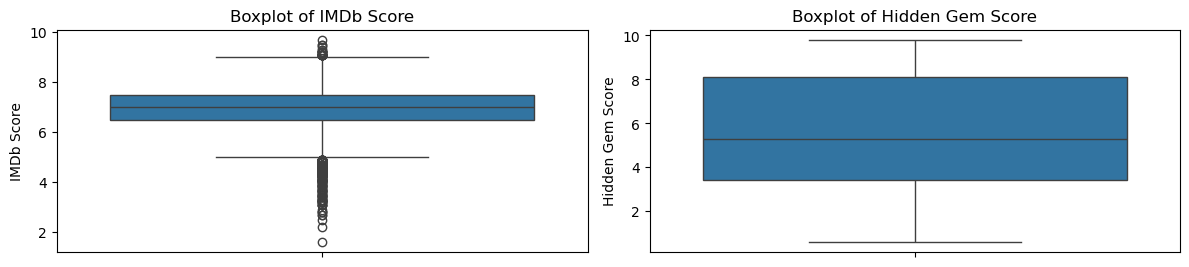

In [14]:
def box_plot(columns):
    plt.figure(figsize=(12, 10))
    for i, col in enumerate(columns, 1):
        plt.subplot(4, 2, i)
        sns.boxplot(y=df[col])
        plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()

box_plot(score_columns)

In [21]:
def parse_list_feature(feature_str):
    """Parse comma-separated features into lists"""
    if pd.isna(feature_str) or feature_str == "":  # Null/empty check
        return []
    return [item.strip() for item in str(feature_str).split(",")]

In [22]:
df["Genre_List"] = df["Genre"].apply(parse_list_feature)
df["Language_List"] = df["Languages"].apply(parse_list_feature)

In [23]:
df.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Boxoffice,Release Date,Netflix Release Date,Production House,Summary,IMDb Votes,Composite_Score,Log_IMDb_Votes,Genre_List,Language_List
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2.122065e+06,12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",A med student with a supernatural gift tries t...,205926.0,6.82,12.235277,"[Crime, Drama, Fantasy, Horror, Romance]","[Swedish, Spanish]"
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,7.063200e+04,08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate","When nerdy Johanna moves to London, things get...",2838.0,6.16,7.951207,[Comedy],[English]
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...",...,4.845788e+07,03 Dec 2020,2021-03-03,NaN,After her ex-boyfriend cons her out of a large...,131.0,7.76,4.882802,"[Comedy, Romance]",[Thai]
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,Unknown,NaN,...,4.845788e+07,14 Jun 2011,2021-03-03,NaN,A group of social welfare workers led by their...,47.0,7.86,3.871201,[Drama],[Polish]
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf SjÃ¶berg,Ivar Lo-Johansson,...,4.845788e+07,31 Oct 1949,2021-03-03,NaN,An unhappily married farm worker struggling to...,88.0,7.18,4.488636,[Drama],[Swedish]


In [24]:
text_features = []

# Combines multiple text-based columns into single strings
for idx, row in df.iterrows():
    combined_text = (
        f"{row['Summary']} {row['Tags']} {row['Director']} {row['Actors']}"
    )
    text_features.append(combined_text)

In [25]:
df['text_features'] = text_features

df.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Release Date,Netflix Release Date,Production House,Summary,IMDb Votes,Composite_Score,Log_IMDb_Votes,Genre_List,Language_List,text_features
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome",A med student with a supernatural gift tries t...,205926.0,6.82,12.235277,"[Crime, Drama, Fantasy, Horror, Romance]","[Swedish, Spanish]",A med student with a supernatural gift tries t...
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate","When nerdy Johanna moves to London, things get...",2838.0,6.16,7.951207,[Comedy],[English],"When nerdy Johanna moves to London, things get..."
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...",...,03 Dec 2020,2021-03-03,NaN,After her ex-boyfriend cons her out of a large...,131.0,7.76,4.882802,"[Comedy, Romance]",[Thai],After her ex-boyfriend cons her out of a large...
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,Unknown,NaN,...,14 Jun 2011,2021-03-03,NaN,A group of social welfare workers led by their...,47.0,7.86,3.871201,[Drama],[Polish],A group of social welfare workers led by their...
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf SjÃ¶berg,Ivar Lo-Johansson,...,31 Oct 1949,2021-03-03,NaN,An unhappily married farm worker struggling to...,88.0,7.18,4.488636,[Drama],[Swedish],An unhappily married farm worker struggling to...


In [26]:
# transforms the text features into a numerical matrix
tfidf = TfidfVectorizer(
    max_features=5000,  # Limits the vocabulary to the 5000 most frequent terms
    stop_words="english",  # Removes common English words
    ngram_range=(1, 2),  # Captures both single words and two-word phrases
)

tfidf_matrix = tfidf.fit_transform(text_features)

In [27]:
# Transforms lists of labels into a binary "one-hot encoded"
genre_encoder = MultiLabelBinarizer()
language_encoder = MultiLabelBinarizer()

# 2. One-hot encode genres
genre_matrix = genre_encoder.fit_transform(df["Genre_List"])

# 3. One-hot encode languages
language_matrix = language_encoder.fit_transform(df["Language_List"])

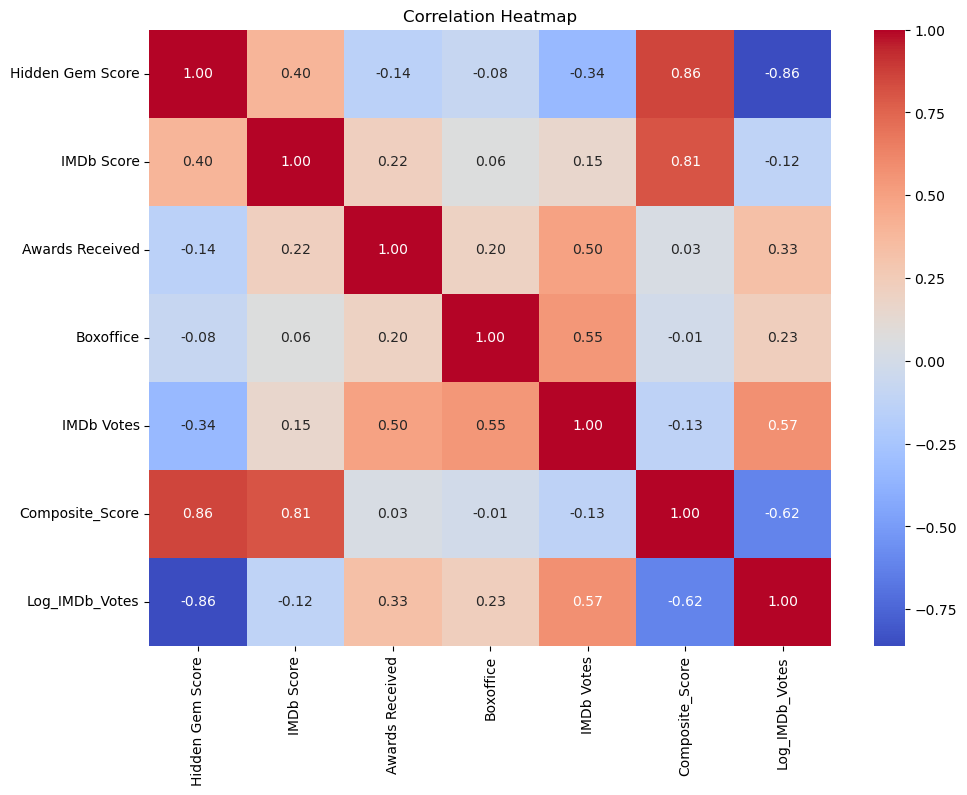

In [28]:
correlation = df.corr(numeric_only=True)

# heatmap for correlation
plt.figure(figsize=(11,8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

`We will not take ['Hidden Gem Score', 'IMDb Score'] into consideration.`

In [ ]:
scaler = StandardScaler()
numerical_features = [
    "Composite_Score",
    'Log_IMDb_Votes',
]
numerical_matrix = scaler.fit_transform(
    df[numerical_features].fillna(0)
)

In [ ]:
# Combine all features
from scipy.sparse import hstack, csr_matrix

feature_matrix = hstack(  # shape (n_items, n_features)
    [
        tfidf_matrix,
        csr_matrix(genre_matrix),
        csr_matrix(language_matrix),
        csr_matrix(numerical_matrix),
    ]
)

In [33]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=0.95)  # Retain 95% variance
feature_matrix_reduced = pca.fit_transform(feature_matrix.toarray())  # If feature_matrix is sparse, convert to dense

print(f"Reduced from {feature_matrix.shape[1]} to {feature_matrix_reduced.shape[1]} features")

Reduced from 5216 to 1051 features


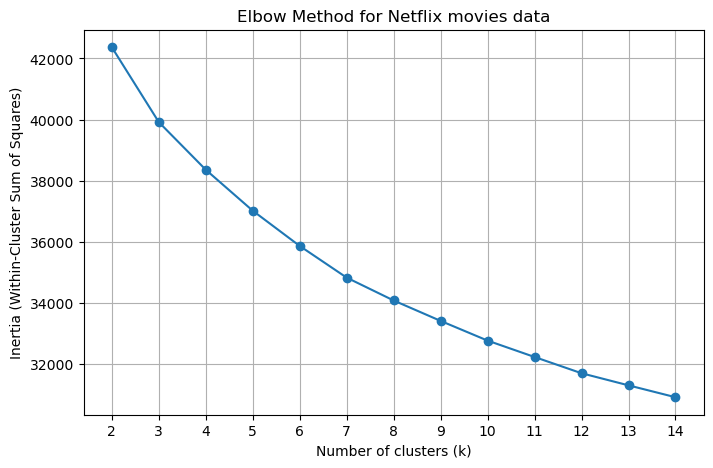

In [35]:
inertia = []
k_range = range(2,15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(feature_matrix_reduced)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Netflix movies data')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.xticks(k_range)
plt.show()

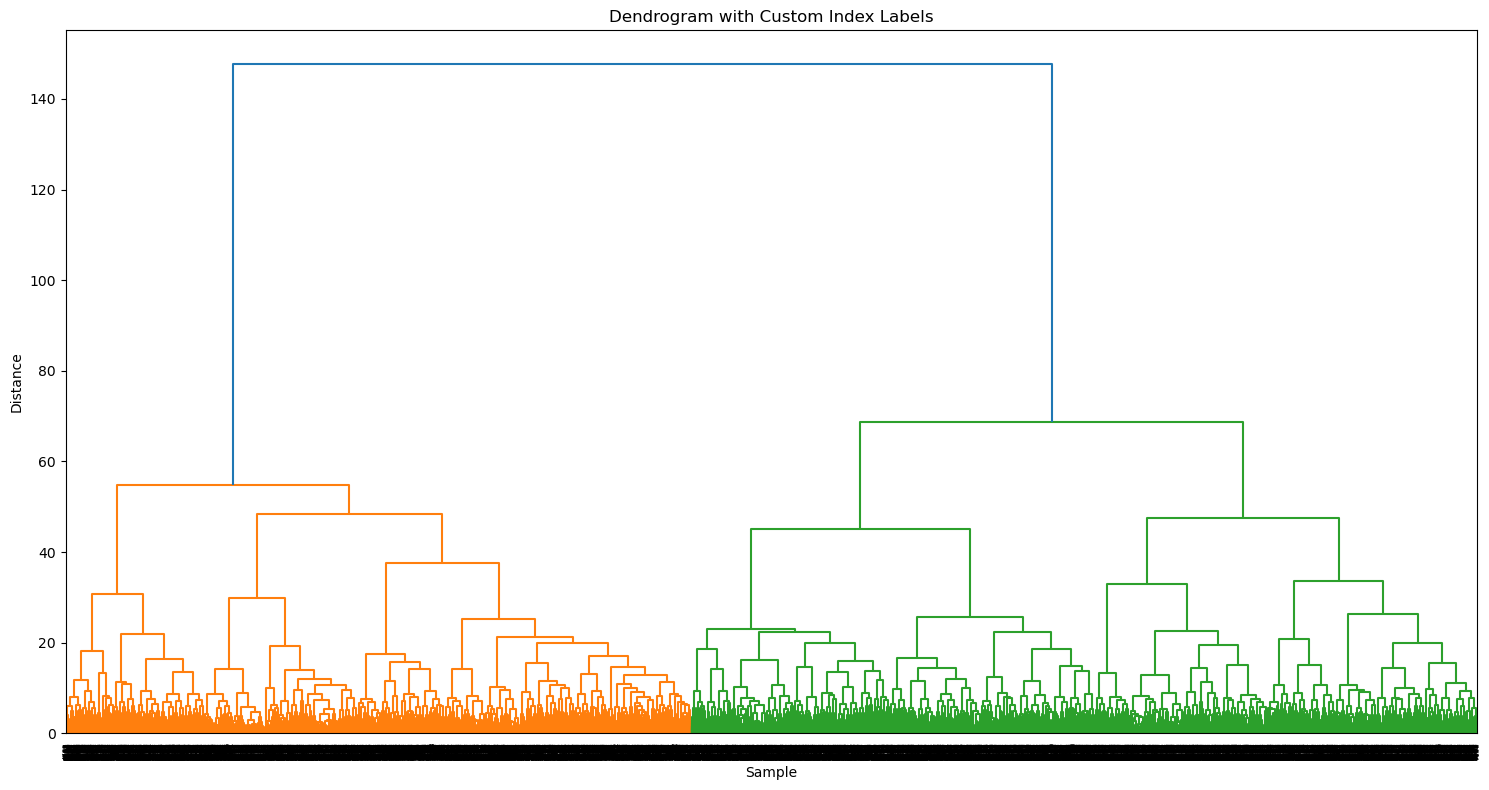

In [36]:
from scipy.cluster.hierarchy import linkage, dendrogram

linked = linkage(feature_matrix_reduced, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(linked, leaf_rotation=90)
plt.title('Dendrogram with Custom Index Labels')
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [37]:
k=7
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(feature_matrix_reduced)

In [38]:
df.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Summary,IMDb Votes,Composite_Score,Log_IMDb_Votes,Genre_List,Language_List,text_features,cluster
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",A med student with a supernatural gift tries t...,205926.0,6.82,12.235277,"[Crime, Drama, Fantasy, Horror, Romance]","[Swedish, Spanish]",A med student with a supernatural gift tries t...,5
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate","When nerdy Johanna moves to London, things get...",2838.0,6.16,7.951207,[Comedy],[English],"When nerdy Johanna moves to London, things get...",3
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...",...,2021-03-03,NaN,After her ex-boyfriend cons her out of a large...,131.0,7.76,4.882802,"[Comedy, Romance]",[Thai],After her ex-boyfriend cons her out of a large...,4
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,Unknown,NaN,...,2021-03-03,NaN,A group of social welfare workers led by their...,47.0,7.86,3.871201,[Drama],[Polish],A group of social welfare workers led by their...,4
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf SjÃ¶berg,Ivar Lo-Johansson,...,2021-03-03,NaN,An unhappily married farm worker struggling to...,88.0,7.18,4.488636,[Drama],[Swedish],An unhappily married farm worker struggling to...,4


In [39]:
silhouette_avg = silhouette_score(feature_matrix_reduced, df["cluster"])

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.08095401417331259


In [ ]:
# from sklearn.metrics.pairwise import cosine_similarity

def get_kmeans_recommendations(title, df=df, feature_matrix=feature_matrix_reduced, num_recommendations=12):
    """
    Get top movie recommendations similar to the target title using KMeans clusters and cosine similarity.

    Parameters:
    - title: str, the title of the movie to find recommendations for
    - df: DataFrame, the dataset with movie details and cluster labels
    - feature_matrix: sparse/dense matrix, the feature matrix used for clustering (e.g., TF-IDF + one-hot + numerical)
    - num_recommendations: int, number of recommendations to return

    Returns:
    - DataFrame with top recommended movies
    """
    # Check if the title exists in the dataset
    if title not in df['Title'].values:
        raise ValueError(f"Title '{title}' not found in the dataset.")

    # Get the cluster and feature vector of the target movie
    target_movie = df[df['Title'] == title]
    movie_cluster = target_movie['cluster'].iloc[0] # Extract the cluster of the target movie.
    target_idx = target_movie.index[0] # Get the index of the target movie
    target_features = feature_matrix[target_idx].reshape(1, -1)  # Reshape for cosine similarity (converts into a 2D array)

    # Get all movies in the same cluster
    cluster_movies = df[df['cluster'] == movie_cluster]

    # Get the indices of movies in the same cluster, excluding the target movie.
    cluster_indices = cluster_movies[cluster_movies['Title'] != title].index

    # Extract the feature vectors for all movies in the same cluster
    cluster_features = feature_matrix[cluster_indices]

    # Calculate cosine similarity between the target movie features and other movies features
    similarities = cosine_similarity(target_features, cluster_features)[0]

    # Create a DataFrame with similarities
    recommendations = cluster_movies.loc[cluster_indices].copy()
    recommendations['Similarity'] = similarities

    # Sort by similarity (descending) and select top recommendations
    recommendations = recommendations.sort_values(by='Similarity', ascending=False)

    return recommendations[['Title', 'Genre', 'Series or Movie', 'Director', 'Composite_Score', 'Summary', 'Similarity', 'cluster']].head(num_recommendations)

In [42]:
df.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Summary,IMDb Votes,Composite_Score,Log_IMDb_Votes,Genre_List,Language_List,text_features,cluster
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",A med student with a supernatural gift tries t...,205926.0,6.82,12.235277,"[Crime, Drama, Fantasy, Horror, Romance]","[Swedish, Spanish]",A med student with a supernatural gift tries t...,5
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate","When nerdy Johanna moves to London, things get...",2838.0,6.16,7.951207,[Comedy],[English],"When nerdy Johanna moves to London, things get...",3
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,"Pattaranad Bhiboonsawade, Mez Tharatorn, Thods...",...,2021-03-03,NaN,After her ex-boyfriend cons her out of a large...,131.0,7.76,4.882802,"[Comedy, Romance]",[Thai],After her ex-boyfriend cons her out of a large...,4
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,Unknown,NaN,...,2021-03-03,NaN,A group of social welfare workers led by their...,47.0,7.86,3.871201,[Drama],[Polish],A group of social welfare workers led by their...,4
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf SjÃ¶berg,Ivar Lo-Johansson,...,2021-03-03,NaN,An unhappily married farm worker struggling to...,88.0,7.18,4.488636,[Drama],[Swedish],An unhappily married farm worker struggling to...,4


In [43]:
recommends = get_kmeans_recommendations(title='The Godfather')
recommends['Composite_Score'] = recommends['Composite_Score'].round(2)

recommends

,Title,Genre,Series or Movie,Director,Composite_Score,Summary,Similarity,cluster
8833,The Godfather: Part II,"Crime, Drama",Movie,Francis Ford Coppola,7.68,This second film in the trilogy explores the C...,0.914479,5
8403,GoodFellas,"Biography, Crime, Drama",Movie,Martin Scorsese,7.44,This gripping gangster opus follows real-world...,0.831470,5
8348,Silence of the Lambs,"Crime, Drama, Thriller",Movie,Jonathan Demme,7.37,FBI trainee Clarice Starling ventures into a m...,0.817220,5
8819,The Godfather: Part III,"Crime, Drama",Movie,Francis Ford Coppola,6.34,"In the final installment of the trilogy, gray-...",0.792506,5
8650,The Shawshank Redemption,Drama,Movie,Frank Darabont,7.83,"Framed for murder, upstanding banker Andy Dufr...",0.791955,5
8216,Casino,"Crime, Drama",Movie,Martin Scorsese,6.91,This tense and sordid tale chronicles the rise...,0.778744,5
4772,Cool Hand Luke,"Crime, Drama",Movie,Stuart Rosenberg,7.02,"Luke Jackson likes to do things his own way, w...",0.775498,5
9226,Boyz n the Hood,"Crime, Drama",Movie,John Singleton,6.72,A South Central Los Angeles high schooler stru...,0.747137,5
9132,Reservoir Dogs,"Crime, Drama, Thriller",Movie,Quentin Tarantino,7.07,"In Quentin Tarantinos raw directorial debut, a...",0.746005,5
9090,Pulp Fiction,"Crime, Drama",Movie,Quentin Tarantino,7.61,Quentin Tarantinos stylized crime caper weaves...,0.745470,5


In [44]:
df[df['Title'] == 'The Godfather']

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Summary,IMDb Votes,Composite_Score,Log_IMDb_Votes,Genre_List,Language_List,text_features,cluster
8724,The Godfather,"Crime, Drama","Dramas,Gangster Films,Classic Films,Dramas bas...","English, Italian, Latin",Movie,4.8,"Romania,Hungary,Hong Kong,Canada,Thailand,Belg...",> 2 hrs,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",...,2015-04-14,Paramount Pictures,When an organized-crime family patriarch barel...,1625286.0,7.88,14.301195,"[Crime, Drama]","[English, Italian, Latin]",When an organized-crime family patriarch barel...,5


In [45]:
def get_popular_recommendations(df=df, genre=None, content_type=None, top_n=10):
        """Get popular movies based on composite scores"""
        filtered_df = df.copy()

        # Checks if a genre filter is provided and it's not "All"
        if genre and genre != "All":
            filtered_df = filtered_df[
                filtered_df["Genre"].str.contains(genre, case=False, na=False)
            ]

        # Checks if a content type filter is provided and it's not "All"
        if content_type and content_type != "All":
            filtered_df = filtered_df[filtered_df["Series or Movie"] == content_type]

        # returns the rows with the largest values in "Composite_Score"
        popular_movies = filtered_df.nlargest(top_n, "Composite_Score")[
            [
                "Title",
                "Genre",
                "Series or Movie",
                "Composite_Score",
                "IMDb Score",
                "Summary",
            ]
        ]

        return popular_movies.to_dict("records")

In [46]:
movies = pd.DataFrame(get_popular_recommendations(genre='Action', content_type='Movie'))
movies['Composite_Score'] = movies['Composite_Score'].round(2)

movies

,Title,Genre,Series or Movie,Composite_Score,IMDb Score,Summary
0,Ejen Ali The Movie,"Animation, Action, Adventure, Comedy, Mystery,...",Movie,8.69,8.6,As MATA seeks to upgrade its gadget for all ag...
1,GTO Drama Special,"Drama, Comedy, Action, Adventure",Movie,8.64,8.4,"In this post-TV-series special, Onizuka finds ..."
2,Lupinranger VS Patranger VS Kyuranger,"Action, Fantasy, Sci-Fi",Movie,8.54,8.3,Two rival Sentais team up with heroes from ano...
3,Dragon Quest: The Adventure of Dai,"Animation, Action, Adventure, Fantasy",Movie,8.34,8.1,"After an encounter with Princess Leona, Dai se..."
4,Ultra Fight Victory,"Action, Adventure, Sci-Fi",Movie,8.30,8.0,Ultraman Victory pursues the monster Yapool af...
5,Gintama: The Movie: The Final Chapter: Be Fore...,"Animation, Action, Comedy, Sci-Fi",Movie,8.27,8.3,"A time traveler sends Gintoki into the future,..."
6,Gintama: The Movie,"Animation, Action, Comedy, Sci-Fi",Movie,8.27,8.3,"In medieval Tokyo (then known as Edo), aging s..."
7,Attack on Titan: The Roar of Awakening,"Animation, Action, Fantasy, Horror, Sci-Fi",Movie,8.13,8.1,The Survey Corps decides it can use Erens Tita...
8,Die Hard 2 (Die Harder),Action,Movie,8.13,7.8,"Its Christmas Eve, and cop John McClane just w..."
9,The Free State of Jones,"Short, Action, Drama, History",Movie,8.13,7.8,"In this fact-based drama, a rebellious farmer ..."


In [47]:
# Searches for movies by looking for a query string in specified columns
def search_movies(query, df=df, search_in=["Title", "Genre", "Director", "Actors"]):
        """Search for movies based on different criteria"""
        results = pd.DataFrame()

        for column in search_in:
            if column in df.columns:
                matches = df[
                    df[column].str.contains(query,
                                            case=False, # Case-insensitive search
                                            na=False # Ignore NaN/empty values
                                            )
                ]
                results = pd.concat([results, matches])

        # Removes duplicate rows that have the same index (same movie appearing multiple times)
        if not results.empty:
            results = results.loc[~results.index.duplicated(keep="first")]

        return (
            results[
                [
                    "Title",
                    "Genre",
                    "Director",
                    "Actors",
                    "IMDb Score",
                    "Series or Movie",
                    "Summary",
                ]
            ]
            .head(20)
            .to_dict("records")
        )

In [48]:
results = pd.DataFrame(search_movies("Action"))

results

,Title,Genre,Director,Actors,IMDb Score,Series or Movie,Summary
0,The Accidental Detective 2: In Action,"Comedy, Crime, Thriller",Eon-hie Lee,"Yeong-hie Seo, Dong-il Sung, Sang-Woo Kwon, Su...",6.5,Movie,"With a newly set up detective agency, two priv..."
1,Extraction,"Action, Thriller",Sam Hargrave,"Bryon Lerum, Chris Hemsworth, Rudhraksh Jaiswa...",6.7,Movie,A hardened mercenarys mission becomes a soul-s...
2,Action Figures 2,Documentary,Travis Pastrana,"Lyn-z Pastrana, Tarah Gieger, Trevor Jacob, Et...",7.6,Movie,This sequel from X Games medalist Travis Pastr...
3,Action Point,Comedy,Tim Kirkby,"Eleanor Worthington-Cox, Johnny Knoxville, Dan...",5.1,Movie,A daredevil stuntman builds a second-rate amus...
4,Extraction,"Action, Thriller",Steven C. Miller,"Bruce Willis, Kellan Lutz, D.B. Sweeney, Gina ...",4.1,Movie,"When a retired CIA agent is kidnapped, his son..."
5,Last Action Hero,"Action, Adventure, Comedy, Fantasy",John McTiernan,"Charles Dance, Art Carney, Arnold Schwarzenegg...",6.4,Movie,A magic movie ticket gains a young fan unprece...
6,Fatal Attraction,"Drama, Thriller",Adrian Lyne,"Ellen Latzen, Michael Douglas, Anne Archer, Gl...",6.9,Movie,Married Dans passing indiscretion comes back t...
7,Looney Tunes: Back in Action,"Animation, Adventure, Comedy, Family","Joe Dante, Eric Goldberg","Jenna Elfman, Timothy Dalton, Steve Martin, Br...",5.7,Movie,Daffy Duck quits his job at a Hollywood studio...
8,I,"Action, Adventure, Fantasy, Sci-Fi",George Lucas,"Ewan McGregor, Natalie Portman, Jake Lloyd, Li...",6.5,Movie,A young man seeking his identity begins a roma...
9,Girls und Panzer das Finale,"Animation, Action, Comedy",Tsutomu Mizushima,"Ikumi Nakagami, Mai Fuchigami, Mami Ozaki, Ai ...",7.3,Series,The girls on Oaraiâs tankery team look forwa...


In [49]:
def get_unique_genres(df=df):
        """Get list of unique genres for dropdown"""
        all_genres = []
        for genre_list in df["Genre_List"]:
            # add all elements from the current genre_list to the all_genres list
            # [extend() is used instead of append() because we want to add multiple items from a list, not add the list itself]
            all_genres.extend(genre_list) 
        return sorted(
            list(
                set(all_genres) # Creates a set to remove duplicate genres
                )
            )

In [50]:
with open("kmeans_scaler.pkl", "wb") as f:
    pickle.dump({
        "df": df,
        "model": kmeans,
        "tfidf_vectorizer": tfidf,
        "Scaler": scaler,
        "Genre_encoder": genre_encoder,
        "Language_encoder": language_encoder,
        "PCA": pca
    }, f)
